# COVID-19: Viral Proteins Identification

***
![](https://miro.medium.com/max/700/1*7pJ7RB9UcKH12gGBi3MBEQ.png)<div align="center"><a href="https://www.freepik.com/photos/background"></div>

***

<div class="list-group" id="list-tab" role="tablist">
  <h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">CONTENT</h3>
    
> ####  Introduction
> ####  Materials and methods
> ####  1. COVID-19: Genetic information
> ####  2. Transcription
> ####  3. Translation
> ####  4. Open Reading Frames
***

## Introduction
Viral proteins are proteins generated by a virus. As viruses hijack much of their host's cellular machinery to support their life cycle, they encode very few of their own genes; viral proteins are therefore generally structural components, for the viral envelope and capsid [[1]](https://www.nature.com/subjects/viral-proteins).


In this study, we will try to identify those viral proteins in the novel COVID-19 genome, the genome was sequenced from a sample of bronchoalveolar lavage fluid from a single patient who was a worker at the market and who was admitted to the Central Hospital of Wuhan on 26 December 2019. Comparative analysis of the COVID-19 viral proteins with the SARS, MERS and other bat coronaviruses proteins will be carried in this study.



## Materials and methods
* COVID-19 coronavirus genome sequence from the paper: [A new coronavirus associated with human respiratory disease in China](https://www.nature.com/articles/s41586-020-2008-3#rightslink).

* COVID-19 genome analysis was carried with [Biopython](https://biopython.org) and [DNA features viewer](https://github.com/Edinburgh-Genome-Foundry/DnaFeaturesViewer) libraries.

* [PSI-BLAST](https://www.ebi.ac.uk/Tools/sss/psiblast/) search was used to compare our COVID-19 proteins with the SARS and Bat coronavirus proteins.


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO

import os
import scprep
#download_path = os.path.expanduser("~/Downloads/")
#print(download_path)
scprep.io.download.download_google_drive(id="1-S4goCTr-P73cL7kqdsS7xvXMY_6GfXd", 
                                         destination='MN908947.fna')
covid19 = SeqIO.read('MN908947.fna', "fasta")
record = SeqIO.read('MN908947.fna', "fasta")


## 1- COVID-19: Genetic Information
***
   
   Genome sequencing has increasingly become an important tool for studying disease outbreaks. The covid-19 genome used in this study was sequenced from a sample of bronchoalveolar lavage fluid from a single patient who was a worker at the market and who was admitted to the Central Hospital of Wuhan on 26 December 2019 [[2]](https://www.nature.com/articles/s41586-020-2008-3#rightslink). 

We start our analysis by reading the DNA sequence:

In [2]:
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO
covid19 = SeqIO.read('MN908947.fna', "fasta")

In [3]:
print(f'The genome of the virus causing Covid-19 (known as SARS-CoV-2) consists of {len(covid19)} genetic bases or letters.')

The genome of the virus causing Covid-19 (known as SARS-CoV-2) consists of 29903 genetic bases or letters.


> ### 1.1- What is DNA?
***

DNA is the hereditary material in humans and almost all other organisms. Nearly every cell in a person’s body has the same DNA. Most DNA is located in the cell nucleus (where it is called nuclear DNA), but a small amount of DNA can also be found in the mitochondria (where it is called mitochondrial DNA or mtDNA) [[3]](https://ghr.nlm.nih.gov/primer/basics/dna).



<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e2/Eukaryote_DNA-en.svg/1280px-Eukaryote_DNA-en.svg.png" width="600"/>
</div>



The information in DNA is stored as a code made up of four chemical bases: adenine **A**, guanine **G**, cytosine **C**, and thymine **T** *(figure below)*. The order, or sequence, of these bases determines the information available for building and maintaining an organism, similar to the way in which letters of the alphabet appear in a certain order to form words and sentences. 

Consider it, as if it was another language just like English or French, in this case, it has just 4 alphabet letters: **A T G C**, where a sequence of those letters, say **ATGCGCAAGTA**, is responsible of a functionality in your body, for example the secretion of hormones that control your mood.

*(The figure below shows the sequence of **A T C G** in the DNA)*

![]()

<div>
<img src="http://www.nature.com/scitable/content/ne0000/ne0000/ne0000/ne0000/104944953/73_1_2.jpg" width="600"/>
</div>



As shown above, the covid-19 genome has 29903 genetic letters (sequence of **A T C** and **G**), to have an idea of how small it is, the human genome has more than 3 billion genetic letters. The small size of the viruses and microorganisms make them easier to study compared to the human genome.

The code below shows the Covid-19's first 200 genetic letters (out of 29903 letters).

In [4]:
covid_DNA= covid19.seq
print( covid_DNA[:200])

ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGT


Before moving forward, let's breakdown this long string to single characters and see the distribution of the nucleotides (A,T,C,G) over the Covid19's DNA.

In [5]:
#Count the nucleotides frequency in the DNA
DNA= covid_DNA
nucleotides={}
for n in DNA:
    if n in nucleotides:
        nucleotides[n] += 1
    else:
        nucleotides[n] =  1
print(nucleotides)

#Create a dataframe
nts= pd.DataFrame(data=nucleotides, index=[0]).T.reset_index()
nts= nts.rename(columns={0: 'frequency', 'index': 'nucleotides'})
nts=nts.sort_values(by=['frequency'], ascending=True)

{'A': 8954, 'T': 9594, 'G': 5863, 'C': 5492}


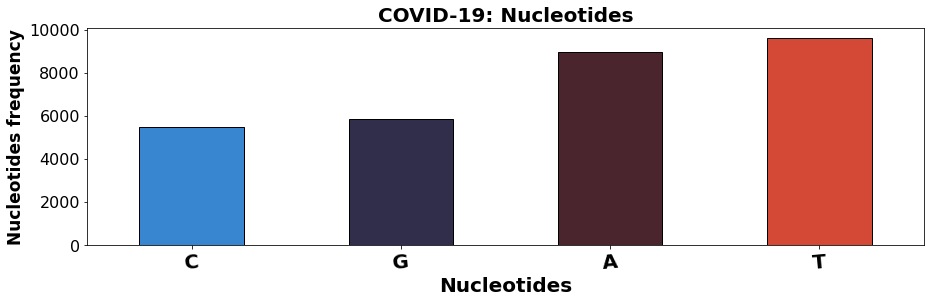

In [6]:
#plot the nucleotides frequency
import matplotlib.pyplot as plt
plt.figure(figsize=(15,4))
a= nts['frequency'].plot.bar(color=sns.color_palette('icefire',4), edgecolor='black')
plt.xticks(rotation=5)
plt.ylabel("Nucleotides frequency", weight='bold', fontsize=17)
r=list(range(len(nts)))
plt.xticks(r, nts.nucleotides, weight='bold', fontsize=20)
plt.xlabel("Nucleotides", weight='bold', size=20)
plt.yticks(fontsize=16)
plt.title("COVID-19: Nucleotides", weight='bold', size=20)
plt.savefig('covid_nucleotides.png')
plt.show()

*First observation:* The frequency of the nucleotides **A** and **T** is higher than the frequency of **C** and **G**. This is due to the nucleotides pairing.

This sequence of genetic bases contain all the information encoded in the virus. Understanding this genetic information is the key to find cures and vaccines. So, the question here is: **How do we extract information from this long sequence of letters?**

This process is called **gene expression**: Gene expression is the process by which **information** from a gene is used in the synthesis of a functional gene **product**. These products are often **proteins**.

- **TRANSCRIPTION**: DNA is copied out into a messenger RNA (mRNA)
- **TRANSLATION**: mRNA is translated into amino acids
- **AMINO ACID FOLDING**: A sequence of 20 or more amino acids *(the building blocks of proteins)* form a protein.

![](https://i.ibb.co/KjMLgdm/Sample-Essay-on-Regulation-of-gene-expression.jpg)



### 2- Transcription
***
Transcription is the first step in gene expression. It involves copying a gene's DNA sequence to make an RNA molecule.
- Basically the mRNA is a copy of our DNA. However, in RNA, a base called uracil (U) replaces thymine (T) as the complementary nucleotide to adenine (that's the only difference, T is replaced by U).

In [7]:
covid_mRNA = covid_DNA.transcribe()
print(covid_mRNA[:100])

AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUCUUGUAGAUCUGUUCUCUAAACGAACUUUAAAAUCUGUGUGGCUGUCACUC


In order to see the difference, we align the covid-19 DNA and mRNA sequences. We can see that the mRNA is an identical copy with the **T** base replaced by **U**

In [8]:
print(f'Covid-19 DNA: {covid_DNA[:50]}')
print(f'Covid-19 RNA: {covid_mRNA[:50]}')

Covid-19 DNA: ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTC
Covid-19 RNA: AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUC


### 3- Translation
***
Translation is the process that takes the information passed from DNA as messenger RNA and turns it into a series of **amino acids**.

It is essentially a translation from one code **(nucleotide A T C G sequence)** to another code **(amino acid sequence)**.

How does this translation happen? As in any language, we need a dictionary for translation, in this case the amino acid dictionary is the table below. The nucleotides are read in groups of three "AUG GCC CAG UUA ...". Each triplet is called a codon and codes for a specific amino acid.




<div>
<img src="https://www.3dmoleculardesigns.com/3DMD-Files/Posters/Codon-photo-gallery/GeneticCodonPoster.jpg?" width="700"/>
</div>

There are 61 codons for 20 amino acids, and each of them is "read" to specify a certain amino acid out of the 
20 commonly found in proteins. 

One codon, AUG, specifies the amino acid methionine and also acts as a start codon to signal the start of protein construction.

There are three more codons that do not specify amino acids. These stop codons, UAA, UAG, and UGA, tell the cell when a polypeptide is complete. All together, this collection of codon-amino acid relationships is called the genetic code, because it lets cells “decode” an mRNA into a chain of amino acids.

Luckily, with the translate() function, python does translate the mRNA to amino acids chains. Chains are separated with a * which is the stop codon ( UAA, UAG and UGA) [[5]](https://www.khanacademy.org/science/biology/gene-expression-central-dogma/translation-polypeptides/a/translation-overview).

In [9]:
covid_aa = covid_mRNA.translate()
print(covid_aa[:99])

IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER*DGEPCPWFQRE


In [10]:
print(f"Covid-19's genome has {len(covid_aa)} amino acids")

Covid-19's genome has 9967 amino acids


- We have several chains of a total of 9967 amino acids separated with stop codons * 
- The split() function splits the sequence at any stop codon and keeps the amino acids chains separated. This makes it easier for further analysis.


In [11]:
Proteins = covid_aa.split('*')
Proteins[:5]

[Seq('IKGLYLPR'),
 Seq('QTNQLSISCRSVL'),
 Seq('TNFKICVAVTRLHA'),
 Seq('CTHAV'),
 Seq('LITNYCR')]

In [12]:
print(f'We have {len(Proteins)} amino acid chains in the covid-19 genome')

We have 775 amino acid chains in the covid-19 genome


#### RECAP:

    1- We started our analysis with the whole genome, that has 29903 nucleotides.
 
    2- Transcribed the DNA or copied it out to an mRNA.

    3- The mRNA was translated to 9967 amino acids.
 
    4- The amino acid sequences were split at the stop codons.
 
    5- We ended up with 775 amino acid chains.
 
 
It's worth to mention that not all the amino acids sequences are proteins. Only the sequences with more than 20 amino acids code for functional proteins. The short amino acid sequences are oligopeptides and have other  functionalities. Here, we will focus on the chains with more than 20 amino acid chains: **Proteins**.

*(We filter and keep just the proteins with more than 50 amino acids to have a shorter list of proteins to analyse).*

In [13]:
for i in Proteins[:]:
    if len(i) < 50:
        Proteins.remove(i)

In [14]:
print(f'We have {len(Proteins)} proteins with  more than 50 amino acids in the covid-19 genome')

We have 5 proteins with  more than 50 amino acids in the covid-19 genome


In [15]:
proteinas=pd.DataFrame(Proteins)
proteinas['amino acid sequence'] = proteinas[0].apply(str)
proteinas['Protein length'] = proteinas[0].apply(len)
proteinas.rename(columns={0: "sequence"}, inplace=True)
pro=proteinas.drop('sequence', axis=1)
pro_= pro.sort_values(by=['Protein length'], ascending=False)

In [16]:
pd.options.display.max_colwidth = 80
import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)

s = pro_.style.background_gradient(cmap=cm)
s

,amino acid sequence,Protein length
0,CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNCCRFQEKDEDDNLIDSYFVVKRHTFSNYQHEETIYNLLKDCPAVAKHDFFKFRIDGDMVPHISRQRLTKYTMADLVYALRHFDEGNCDTLKEILVTYNCCDDDYFNKKDWYDFVENPDILRVYANLGERVRQALLKTVQFCDAMRNAGIVGVLTLDNQDLNGNWYDFGDFIQTTPGSGVPVVDSYYSLLMPILTLTRALTAESHVDTDLTKPYIKWDLLKYDFTEERLKLFDRYFKYWDQTYHPNCVNCLDDRCILHCANFNVLFSTVFPPTSFGPLVRKIFVDGVPFVVSTGYHFRELGVVHNQDVNLHSSRLSFKELLVYAADPAMHAASGNLLLDKRTTCFSVAALTNNVAFQTVKPGNFNKDFYDFAVSKGFFKEGSSVELKHFFFAQDGNAAISDYDYYRYNLPTMCDIRQLLFVVEVVDKYFDCYDGGCINANQVIVNNLDKSAGFPFNKWGKARLYYDSMSYEDQDALFAYTKRNVIPTITQMNLKYAISAKNRARTVAGVSICSTMTNRQFHQKLLKSIAATRGATVVIGTSKFYGGWHNMLKTVYSDVENPHLMGWDYPKCDRAMPNMLRIMASLVLARKHTTCCSLSHRFYRLANECAQVLSEMVMCGGSLYVKPGGTSSGDATTAYANSVFNICQAVTANVNALLSTDGNKIADKYVRNLQHRLYECLYRNRDVDTDFVNEFYAYLRKHFSMMILSDDAVVCFNSTYASQGLVASIKNFKSVLYYQNNVFMSEAKCWTETDLTKGPHEFCSQHTMLVKQGDDYVYLPYPDPSRILGAGCFVDDIVKTDGTLMIERFVSLAIDAYPLTKHPNQEYADVFHLYLQYIRKLHDELTGHMLDMYSVMLTNDNTSRYWEPEFYEAMYTPHTVLQAVGACVLCNSQTSLRCGACIRRPFLCCKCCYDHVISTSHKLVLSVNPYVCNAPGCDVTDVTQLYLGGMSYYCKSHKPPISFPLCANGQVFGLYKNTCVGSDNVTDFNAIATCDWTNAGDYILANTCTERLKLFAAETLKATEETFKLSYGIATVREVLSDRELHLSWEVGKPRPPLNRNYVFTGYRVTKNSKVQIGEYTFEKGDYGDAVVYRGTTTYKLNVGDYFVLTSHTVMPLSAPTLVPQEHYVRITGLYPTLNISDEFSSNVANYQKVGMQKYSTLQGPPGTGKSHFAIGLALYYPSARIVYTACSHAAVDALCEKALKYLPIDKCSRIIPARARVECFDKFKVNSTLEQYVFCTVNALPETTADIVVFDEISMATNYDLSVVNARLRAKHYVYIGDPAQLPAPRTLLTKGTLEPEYFNSVCRLMKTIGPDMFLGTCRRCPAEIVDTVSALVYDNKLKAHKDKSAQCFKMFYKGVITHDVSSAINRPQIGVVREFLTRNPAWRKAVFISPYNSQNAVASKILGLPTQTVDSSQGSEYDYVIFTQTTETAHSCNVNRFNVAITRAKVGILCIMSDRDLYDKLQFTSLEIPRRNVATLQAENVTGLFKDCSKVITGLHPTQAPTHLSVDTKFKTEGLCVDIPGIPKDMTYRRLISMMGFKMNYQVNGYPNMFITREEAIRHVRAWIGFDVEGCHATREAVGTNLPLQLGFSTGVNLVAVPTGYVDTPNNTDFSRVSAKPPPGDQFKHLIPLMYKGLPWNVVRIKIVQMLSDTLKNLSDRVVFVLWAHGFELTSMKYFVKIGPERTCCLCDRRATCFSTASDTYACWHHSIGFDYVYNPFMIDVQQWGFTGNLQSNHDLYCQVHGNAHVASCDAIMTRCLAVHECFVKRVDWTIEYPIIGDELKINAACRKVQHMVVKAALLADKFPVLHDIGNPKAIKCVPQADVEWKFYDAQPCSDKAYKIEELFYSYATHSDKFTDGVCLFWNCNVDRYPANSIVCRFDTRVLSNLNLPGCDGGSLYVNKHAFHTPAFDKSAFVNLKQLPFFYYSDSPCESHGKQVVSDIDYVPLKSATCITRCNLGGAVCRHHANEYRLYLDAYNMMISAGFSLWVYKQFDTYNLWNTFTRLQSLENVAFNVVNKGHFDGQQGEVPVSIINNTVYTKVDGVDVELFENKTTLPVNVAFELWAKRNIKPVPEVKILNNLGVDIAANTVIWDYKRDAPAHISTIGVCSMTDIAKKPTETICAPLTVFFDGRVDGQVDLFRNARNGVLITEGSVKGLQPSVGPKQASLNGVTLIGEAVKTQFNYYKKVDGVVQQLPETYFTQSRNLQEFKPRSQMEIDFLELAMDEFIERYKLEGYAFEHIVYGDFSHSQLGGLHLLIGLAKRFKESPFELEDFIPMDSTVKNYFITDAQTGSSKCVCSVIDLLLDDFVEIIKSQDLSVVSKVVKVTIDYTEISFMLWCKDGHVETFYPKLQSSQAWQPGVAMPNLYKMQRMLLEKCDLQNYGDSATLPKGIMMNVAKYTQLCQYLNTLTLAVPYNMRVIHFGAGSDKGVAPGTAVLRQWLPTGTLLVDSDLNDFVSDADSTLIGDCATVHTANKWDLIISDMYDPKTKNVTKENDSKEGFFTYICGFIQQKLALGGSVAIKITEHSWNADLYKLMGHFAWWTAFVTNVNASSSEAFLIGCNYLGKPREQIDGYVMHANYIFWRNTNPIQLSSYSLFDMSKFPLKLRGTAVMSLKEGQINDMILSLLSKGRLIIRENNRVVISSDVLVNN,2701
1,ASAQRSQITLHINELMDLFMRIFTIGTVTLKQGEIKDATPSDFVRATATIPIQASLPFGWLIVGVALLAVFQSASKIITLKKRWQLALSKGVHFVCNLLLLFVTVYSHLLLVAAGLEAPFLYLYALVYFLQSINFVRIIMRLWLCWKCRSKNPLLYDANYFLCWHTNCYDYCIPYNSVTSSIVITSGDGTTSPISEHDYQIGGYTEKWESGVKDCVVLHSYFTSDYYQLYSTQLSTDTGVEHVTFFIYNKIVDEPEEHVQIHTIDGSSGVVNPVMEPIYDEPTTTTSVPL,290
4,TNMKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNSPFHPLADNKFALTCFSTQFAFACPDGVKHVYQLRARSVSPKLFIRQEEVQELYSPIFLIVAAIVFITLCFTLKRKTE,123
2,AQADEYELMYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALRLCAYCCNIVNVSLVKPSFYVYSRVKNLNSSRVPDLLV,83
3,QQMFHLVDFQVTIAEILLIIMRTFKVSIWNLDYIINLIIKNLSKSLTENKYSQLDEEQPMEID,63


In [17]:
pro_

,amino acid sequence,Protein length
0,CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNCCRFQEKDEDDNLIDSYFVVKRHTFSN...,2701
1,ASAQRSQITLHINELMDLFMRIFTIGTVTLKQGEIKDATPSDFVRATATIPIQASLPFGWLIVGVALLAVFQSASK...,290
4,TNMKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNSPFHPLADNKFALTCFSTQFAFACPDGVKHV...,123
2,AQADEYELMYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALRLCAYCCNIVNVSLVKPSFYVYSRVKNLNSS...,83
3,QQMFHLVDFQVTIAEILLIIMRTFKVSIWNLDYIINLIIKNLSKSLTENKYSQLDEEQPMEID,63


Now that we have the protein sequences, we will use the BLAST search.

BLAST (basic local alignment search tool) is an algorithm and program for comparing primary biological sequence information, such as the amino-acid sequences of proteins or the nucleotides of DNA and/or RNA sequences. A BLAST search enables a researcher to compare a subject protein or nucleotide sequence (called a query) with a library or database of sequences, and identify library sequences that resemble the query sequence above a certain threshold.

In other words, we will try to find the protein sequences already available in the databases that are the most similar to our protein sequences. *(Hint: In this case, most probably the proteins that will have the highest similarity with our Covid-19 belong to the SARS coronavirus or Bat coronavirus).*

**An example of how BLAST works:**
- PSI-BLAST webpage: [https://www.ebi.ac.uk/Tools/sss/psiblast/](https://www.ebi.ac.uk/Tools/sss/psiblast/)
- Copy/Paste our 83 amino acid chain : **AQADEYELMYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALRLCAYCCNIVNVSLVKPSFYVYSRVKNLNSSRVPDLLV**
- The figure below shows the result of our 83 amino acids chain: It's the ***Envelope small membrane protein!***

![](https://i.ibb.co/sCzM7J2/Screen-Shot-2020-05-03-at-17-57-25.png)

>The first result has 100% match because it belongs to the covid-19 genome, an information that we already know. In order to know which organism has the highest similarity with our protein, we go to the next result with 95% match: Human SARS coronavirus (SARS-CoV). In other words, COVID-19 has almost the same envelope small membrane protein as the SARS coronavirus.

 ####  BLAST search results: COVID-19 proteins

In [18]:
pd.options.display.max_colwidth = 2702
d={ 'Protein length': [2701,290,123,83,63],
   'DB:ID' : ['P0C6X7', 'Q0Q474', 'Q3I5J0', 'P59637', 'Q3I5J1']
   ,'protein': ['Replicase polyprotein 1ab','Protein 3','Protein 7a', 'Envelope small membrane protein','Non-structural protein 6']
   ,'organism':['Human SARS coronavirus (SARS-CoV)','Bat coronavirus 279/2005 (BtCoV)',
                           'Bat coronavirus Rp3/2004', 'Human SARS coronavirus (SARS-CoV)',
                           'Bat coronavirus Rp3/2004']
   ,'match': ['96%', '75%', '89%', '95%','69%']
                          
   , 'Function' : ['Multifunctional protein involved in the transcription and replication of viral RNAs. Contains the proteinases responsible for the cleavages of the polyprotein.',
                'Forms homotetrameric potassium sensitive ion channels (viroporin) and may modulate virus release',
                'Non-structural protein which is dispensable for virus replication in cell culture.',
                'Plays a central role in virus morphogenesis and assembly. Acts as a viroporin and self-assembles in host membranes forming pentameric protein-lipid pores that allow ion transport.',
                'Could be a determinant of virus virulence. Seems to stimulate cellular DNA synthesis in vitro (By similarity).']
             }

covid_proteins= pd.DataFrame(data=d)
covid_proteins

,Protein length,DB:ID,protein,organism,match,Function
0,2701,P0C6X7,Replicase polyprotein 1ab,Human SARS coronavirus (SARS-CoV),96%,Multifunctional protein involved in the transcription and replication of viral RNAs. Contains the proteinases responsible for the cleavages of the polyprotein.
1,290,Q0Q474,Protein 3,Bat coronavirus 279/2005 (BtCoV),75%,Forms homotetrameric potassium sensitive ion channels (viroporin) and may modulate virus release
2,123,Q3I5J0,Protein 7a,Bat coronavirus Rp3/2004,89%,Non-structural protein which is dispensable for virus replication in cell culture.
3,83,P59637,Envelope small membrane protein,Human SARS coronavirus (SARS-CoV),95%,Plays a central role in virus morphogenesis and assembly. Acts as a viroporin and self-assembles in host membranes forming pentameric protein-lipid pores that allow ion transport.
4,63,Q3I5J1,Non-structural protein 6,Bat coronavirus Rp3/2004,69%,Could be a determinant of virus virulence. Seems to stimulate cellular DNA synthesis in vitro (By similarity).


The table above shows the BLAST search results of the 5 amino acid chains obtained from the COVID-19 genome. 
As expected, all the viral proteins have high similarities with viral proteins in SARS and Bat coronaviruses.


## 4- Open Reading Frames:
***

An open reading frame is a portion of a DNA molecule that, when translated into amino acids, contains no stop codons. The genetic code reads DNA sequences in groups of three base pairs, which means that a double-stranded DNA molecule can read in any of six possible reading frames--three in the forward direction and three in the reverse. A long open reading frame is likely part of a gene [[7]](https://www.genome.gov/genetics-glossary/Open-Reading-Frame).

> ### 4.1 Covid-19 ORFs Visualization:

The code below does the trancription and translation to our Covid-19 genome (Genbank format). It shows the ORFs in the genome sequence and the GC% content. 


<h4>  The graph showing the GC% is important to understand where the coding regions are in the genome. <span class="label label-info">Information</span></h4>

<h5>Visualization requires installing the dna-features_viewer library. <span class="label label-warning">Important</span></h5>

<h5>Parsing GFF files requires installing the BCBio library. <span class="label label-warning">Important</span></h5>




<h4>[subianto] Mohon install:</h4>:

- pip install dna_features_viewer 
- pip install bcbio-gff

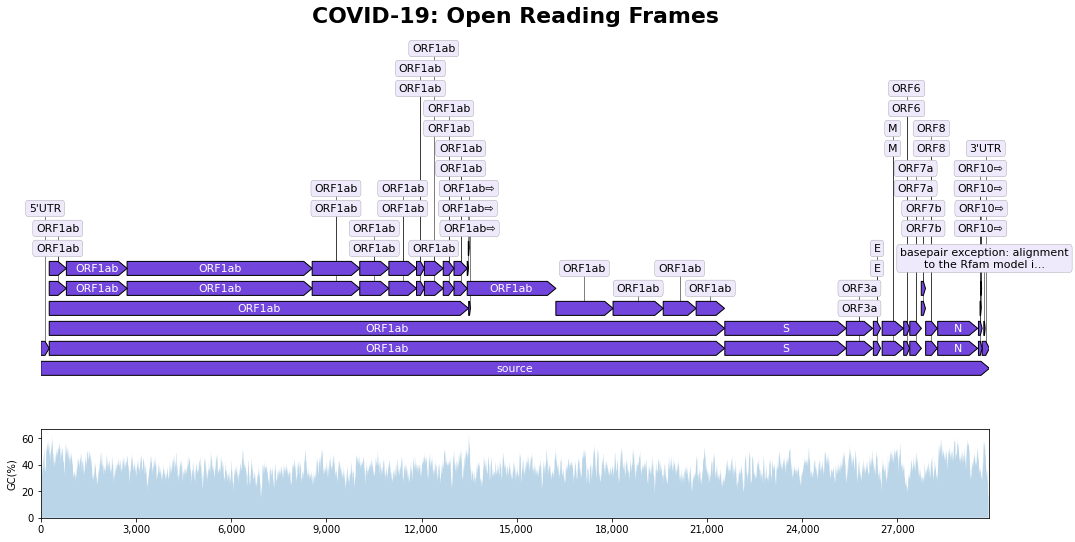

In [19]:
import matplotlib.pyplot as plt
from dna_features_viewer import BiopythonTranslator
from Bio import SeqIO
import numpy as np

fig, (ax1, ax2) = plt.subplots(
    2, 1, figsize=(17, 9), sharex=True, gridspec_kw={"height_ratios": [4, 1]}
)
ax1.set_title('COVID-19: Open Reading Frames', size=22, weight='bold')

# PLOT THE RECORD MAP
scprep.io.download.download_google_drive(id="1xXzwwHknOiF7NA-QhQz5uzj5e_8--i8b", 
                                         destination='sequence.gb.txt')
record = SeqIO.read("sequence.gb.txt", "genbank")

graphic_record = BiopythonTranslator().translate_record(record)
graphic_record.plot(ax=ax1, with_ruler=False, strand_in_label_threshold=4)

# PLOT THE LOCAL GC CONTENT (we use 50bp windows)
gc = lambda s: 100.0 * len([c for c in s if c in "GC"]) / 50
xx = np.arange(len(record.seq) - 50)
yy = [gc(record.seq[x : x + 50]) for x in xx]
ax2.fill_between(xx + 25, yy, alpha=0.3)
ax2.set_ylim(bottom=0)
ax2.set_ylabel("GC(%)")
plt.savefig('orfs.png')
plt.show()



The figure above shows the ORFs in the Covid-19 genome, mainly: **ORF1ab, ORF3a, E, M, S and N.** *(We will analyze those ORFs in the next section in details to find out their functionalities.*

>**GC content** (or guanine-cytosine content) is the percentage of nitrogenous bases in a DNA or RNA molecule that are either guanine (G) or cytosine (C). Evidence of GC ratio with that of length of the coding region of a gene has shown that the length of the coding sequence is directly proportional to higher G+C content.[[18]](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2292697/) This has been pointed to the fact that the stop codon has a bias towards A and T nucleotides, and, thus, the shorter the sequence the higher the AT bias. So, next thing to do: Find those coding regions *CDS.*

> #### 4.2 Finding the coding regions CDS in the Covid-19 genome:

The identification of coding sequences (CDS) is an important step in the functional annotation of genes. CDS is a sequence of nucleotides that corresponds with the sequence of amino acids in a protein. A typical CDS starts with ATG and ends with a stop codon.

The code below highlights the coding regions CDS in red.

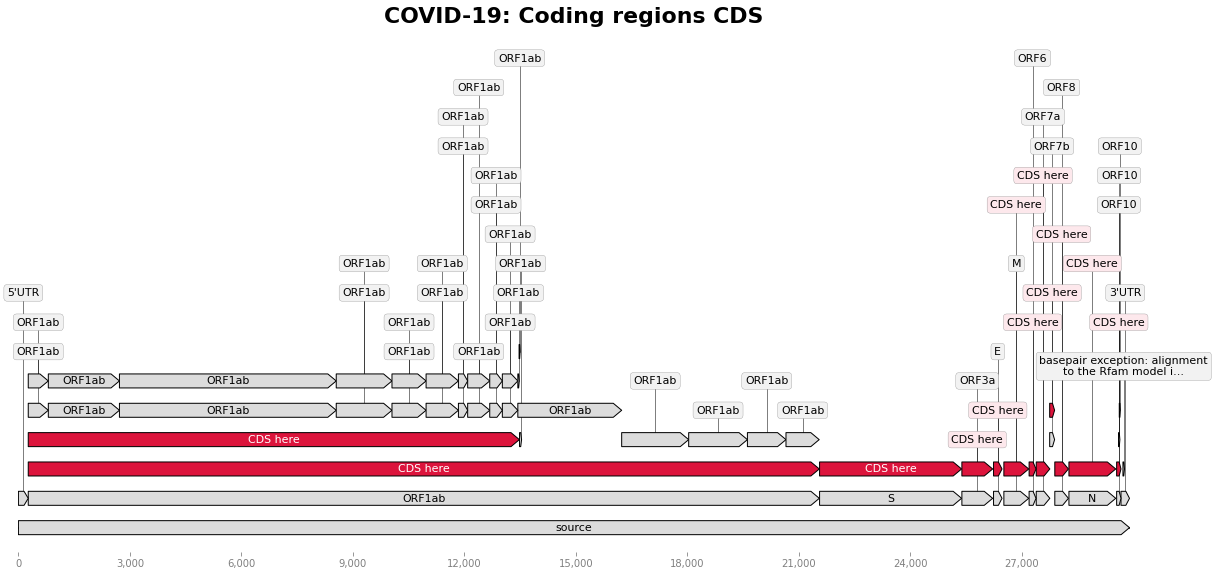

In [20]:
from dna_features_viewer import BiopythonTranslator

class MyCustomTranslator(BiopythonTranslator):
    """Custom translator implementing the following theme:

    - Color terminators in green, CDS in red, all other features in grey.
    - Do not display features that are restriction sites unless they are BamHI
    - Do not display labels for restriction sites
    - For CDS labels just write "CDS here" instead of the name of the gene.

    """

    def compute_feature_color(self, feature):
        if feature.type == "CDS":
            return "crimson"
        elif feature.type == "terminator":
            return "green"
        else:
            return "gainsboro"

    def compute_feature_label(self, feature):
        if feature.type == 'restriction_site':
            return None
        elif feature.type == "CDS":
            return "CDS here"
        else:
            return BiopythonTranslator.compute_feature_label(self, feature)

    def compute_filtered_features(self, features):
        """Do not display promoters. Just because."""
        return [
            feature for feature in features
            if (feature.type != "restriction_site")
            or ("BamHI" in str(feature.qualifiers.get("label", '')))
        ]


graphic_record = MyCustomTranslator().translate_record("sequence.gb.txt")
ax, _ = graphic_record.plot(figure_width=17)
ax.figure.tight_layout()
ax.figure.savefig("custom_bopython_translator.png")
ax.set_title('COVID-19: Coding regions CDS', size=22, weight='bold')
plt.show()

The figure above highlights in red the coding regions CDS in the Covid-19 genome. The main CDS are among the ORFs already found in the previous section, which include the ORF1ab, ORF3a, S protein, M protein and N protein. Let's dig in more and try to find out more information about those ORFs, their coding regions and the functionality of their coding proteins.

The function below finds the Open Reading Frames in the COVID-19 genome. *We set the minimum protein length to 200 amino acids*. 



<h6>In other words, just the ORFs with an amino acid sequence greater than 200 will be considered for further analysis <span class="label label-danger">Important</span></h6>

> #### 4.3 ORFs identification:

In [21]:
table=11
min_pro_len=200
def find_orfs_with_trans(seq, trans_table, min_protein_length):
    answer = []
    seq_len = len(seq)
    for strand, nuc in [(+1, seq), (-1, seq.reverse_complement())]:
        for frame in range(3):
            trans = str(nuc[frame:].translate(trans_table))
            trans_len = len(trans)
            aa_start = 0
            aa_end = 0
            while aa_start < trans_len:
                aa_end = trans.find("*", aa_start)
                if aa_end == -1:
                    aa_end = trans_len
                if aa_end - aa_start >= min_protein_length:
                    if strand == 1:
                        start = frame + aa_start * 3
                        end = min(seq_len, frame + aa_end * 3 + 3)
                    else:
                        start = seq_len - frame - aa_end * 3 - 3
                        end = seq_len - frame - aa_start * 3
                    answer.append((start, end, strand, trans[aa_start:aa_end]))
                aa_start = aa_end + 1
    answer.sort()
    return answer

In [22]:
orf_list = find_orfs_with_trans(record.seq, table, min_pro_len)
for start, end, strand, pro in orf_list:
    print(
        "%s...%s - length %i, strand %i, %i:%i"
        % (pro[:30], pro[-3:], len(pro), strand, start, end))

PKGKMESLVPGFNEKTHVQLSLPVLQVRDV...FAV - length 4409, strand 1, 253:13483
CTIVFKRVCGVSAARLTPCGTGTSTDVVYR...VNN - length 2701, strand 1, 13449:21555
LEKTTELLFLVMFLLTTKRTMFVFLVLLPL...HYT - length 1293, strand 1, 21502:25384
ASAQRSQITLHINELMDLFMRIFTIGTVTL...VPL - length 290, strand 1, 25347:26220
SSGLNELNIILVFLFGTLILAMADSNGTIT...LVQ - length 243, strand 1, 26459:27191
RSCCFRFHLNEQTKMSDNGPQNQRNAPRIT...TQA - length 433, strand 1, 28231:29533


The Covid-19 genome has **6 ORFs with more than 200 amino acids.** We run a BLAST search to find out what proteins do those sequences code for. *(Find the the full length sequences in the output button below).*

In [23]:
orf_list

[(253,
  13483,
  1,
  'PKGKMESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHLKDGTCGLVEVEKGVLPQLEQPYVFIKRSDARTAPHGHVMVELVAELEGIQYGRSGETLGVLVPHVGEIPVAYRKVLLRKNGNKGAGGHSYGADLKSFDLGDELGTDPYEDFQENWNTKHSSGVTRELMRELNGGAYTRYVDNNFCGPDGYPLECIKDLLARAGKASCTLSEQLDFIDTKRGVYCCREHEHEIAWYTERSEKSYELQTPFEIKLAKKFDTFNGECPNFVFPLNSIIKTIQPRVEKKKLDGFMGRIRSVYPVASPNECNQMCLSTLMKCDHCGETSWQTGDFVKATCEFCGTENLTKEGATTCGYLPQNAVVKIYCPACHNSEVGPEHSLAEYHNESGLKTILRKGGRTIAFGGCVFSYVGCHNKCAYWVPRASANIGCNHTGVVGEGSEGLNDNLLEILQKEKVNINIVGDFKLNEEIAIILASFSASTSAFVETVKGLDYKAFKQIVESCGNFKVTKGKAKKGAWNIGEQKSILSPLYAFASEAARVVRSIFSRTLETAQNSVRVLQKAAITILDGISQYSLRLIDAMMFTSDLATNNLVVMAYITGGVVQLTSQWLTNIFGTVYEKLKPVLDWLEEKFKEGVEFLRDGWEIVKFISTCACEIVGGQIVTCAKEIKESVQTFFKLVNKFLALCADSIIIGGAKLKALNLGETFVTHSKGLYRKCVKSREETGLLMPLKAPKEIIFLEGETLPTEVLTEEVVLKTGDLQPLEQPTSEAVEAPLVGTPVCINGLMLLEIKDTEKYCALAPNMMVTNNTFTLKGGAPTKVTFGDDTVIEVQGYKSVNITFELDERIDKVLNEKCSAYTVELGTEVNEFACVVADAVIKTLQPVSELLTPLGIDLDEWSMATYYLFDESGEFKLASHMYCSFYPPDEDEEEGDCEEEEFEPSTQYEYGTEDDYQGKPLEFGATSAALQPE

> #### 4.4 BLAST search results: COVID-19 ORFs:

In [24]:
e={ 'ORF length': [4409,2701,1293,290,243, 433],
   'DB:ID' : ['P0C6U8', 'P0C6X7', 'P59594', 'Q0Q474', 'Q0Q472','P59595']
   ,'protein': ['Replicase polyprotein 1a','Replicase polyprotein 1ab','Spike glycoprotein', 'Protein 3','Membrane protein', 'Nucleoprotein N']
   ,'organism':['Human SARS coronavirus (SARS-CoV)','Human SARS coronavirus (SARS-CoV)',
                           'Human SARS coronavirus (SARS-CoV)', 'Bat coronavirus Rp3/2004',
                           'Bat coronavirus Rp3/2004','Human SARS coronavirus (SARS-CoV)']
   ,'match': ['80%', '96%', '76%', '95%','92%', '91%']
                          
   , 'Function' : ['Multifunctional protein involved in the transcription and replication of viral RNAs. Contains the proteinases responsible for the cleavages of the polyprotein.',
                'Multifunctional protein involved in the transcription and replication of viral RNAs. Contains the proteinases responsible for the cleavages of the polyprotein',
                'attaches the virion to the cell membrane by interacting with host receptor, initiating the infection (By similarity). Binding to human ACE2 and CLEC4M/DC-SIGNR receptors and internalization of the virus into the endosomes of the host cell induces conformational changes in the S glycoprotein. Proteolysis by cathepsin CTSL may unmask the fusion peptide of S2 and activate membranes fusion within endosomes.',
                'Forms homotetrameric potassium sensitive ion channels (viroporin) and may modulate virus release.',
                'Component of the viral envelope that plays a central role in virus morphogenesis and assembly via its interactions with other viral proteins.',
                'Packages the positive strand viral genome RNA into a helical ribonucleocapsid (RNP) and plays a fundamental role during virion assembly through its interactions with the viral genome and membrane protein M']
             }

covid_orf=pd.DataFrame(data=e)
cm = sns.light_palette("red", as_cmap=True)

covid_orf2 = covid_orf.style.background_gradient(cmap=cm)
covid_orf2

,ORF length,DB:ID,protein,organism,match,Function
0,4409,P0C6U8,Replicase polyprotein 1a,Human SARS coronavirus (SARS-CoV),80%,Multifunctional protein involved in the transcription and replication of viral RNAs. Contains the proteinases responsible for the cleavages of the polyprotein.
1,2701,P0C6X7,Replicase polyprotein 1ab,Human SARS coronavirus (SARS-CoV),96%,Multifunctional protein involved in the transcription and replication of viral RNAs. Contains the proteinases responsible for the cleavages of the polyprotein
2,1293,P59594,Spike glycoprotein,Human SARS coronavirus (SARS-CoV),76%,"attaches the virion to the cell membrane by interacting with host receptor, initiating the infection (By similarity). Binding to human ACE2 and CLEC4M/DC-SIGNR receptors and internalization of the virus into the endosomes of the host cell induces conformational changes in the S glycoprotein. Proteolysis by cathepsin CTSL may unmask the fusion peptide of S2 and activate membranes fusion within endosomes."
3,290,Q0Q474,Protein 3,Bat coronavirus Rp3/2004,95%,Forms homotetrameric potassium sensitive ion channels (viroporin) and may modulate virus release.
4,243,Q0Q472,Membrane protein,Bat coronavirus Rp3/2004,92%,Component of the viral envelope that plays a central role in virus morphogenesis and assembly via its interactions with other viral proteins.
5,433,P59595,Nucleoprotein N,Human SARS coronavirus (SARS-CoV),91%,Packages the positive strand viral genome RNA into a helical ribonucleocapsid (RNP) and plays a fundamental role during virion assembly through its interactions with the viral genome and membrane protein M


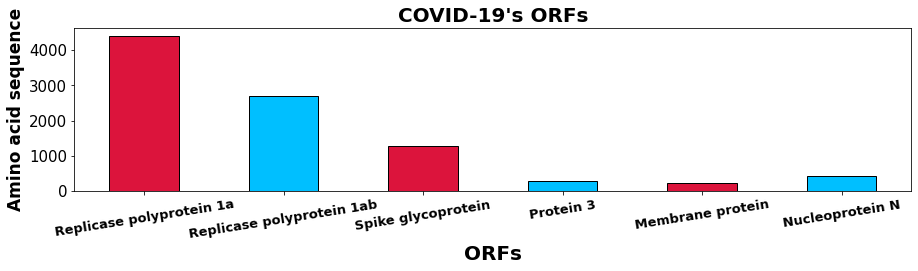

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,3))
covid_orf['ORF length'].plot.bar(color=('crimson','deepskyblue'), edgecolor='black')
plt.xticks(rotation=9)
plt.ylabel("Amino acid sequence", weight='bold', fontsize=17)
plt.yticks(fontsize=15)
r=list(range(len(covid_orf)))
plt.xticks(r, covid_orf.protein, weight='bold', fontsize=13)
plt.xlabel("ORFs", weight='bold', size=20)
plt.title("COVID-19's ORFs", weight='bold', size=20)
plt.show()

We did a genome analysis and managed to find the main COVID-19 viral proteins *(figure below)* **: Spike protein (S), Nucleoprotein (N), Membrane protein (M), Envelope protein (E) and the replicase polyprotein.** 

![](https://d1gk4lfg3bst7c.cloudfront.net/media/wysiwyg/2019-nCoV-figure-ad_1.png)

The Open Coding Frames coded for the most important viral proteins in the COVID-19: Replicase polyprotein, Nucleoprotein, Membrane protein and mainly the Spike glycoprotein. The Spike glycoprotein (S) is the main protein candidate for vaccine development. In studies related to SARS-CoV, vaccine candidates were developped expressing the **membrane-anchored SARS-CoV spike (S) protein**. [[8]](https://www.ncbi.nlm.nih.gov/pubmed/24606680)

### 5- Spike glycoprotein analysis:
***
The spike glycoprotein (or just “spike protein”) is the familiar spike that studs the surface of the coronavirus, giving it the appearance of a crown to electron microscopy, hence “corona” (Latin: crown).

![](https://resources.rndsystems.com/images/site/coronavirus-LP-graphic-2.jpg)

The S protein is responsible for facilitating entry of the CoV into the target cell. It is composed of a short intracellular tail, a transmembrane anchor, and a large ectodomain that consists of a receptor binding S1 subunit and a membrane-fusing S2 subunit. In the previous section, our sequence analysis of the SARS-CoV-2 S protein genome showed that it was only 76% identical with the SARS-CoV S protein [[14]](https://www.rndsystems.com/resources/articles/ace-2-sars-receptor-identified).

In [26]:
covid_orf.iloc[2].to_frame().T

,ORF length,DB:ID,protein,organism,match,Function
2,1293,P59594,Spike glycoprotein,Human SARS coronavirus (SARS-CoV),76%,"attaches the virion to the cell membrane by interacting with host receptor, initiating the infection (By similarity). Binding to human ACE2 and CLEC4M/DC-SIGNR receptors and internalization of the virus into the endosomes of the host cell induces conformational changes in the S glycoprotein. Proteolysis by cathepsin CTSL may unmask the fusion peptide of S2 and activate membranes fusion within endosomes."


Analysis of the receptor binding motif (RBM) in the S protein showed that most of the amino acid residues essential for receptor binding were conserved between SARS-CoV and SARS-CoV-2, suggesting that the 2 CoV strains use the same host receptor for cell entry.12 The entry receptor utilized by SARS-CoV is [Angiotensin-Converting Enzyme 2](https://www.rndsystems.com/target/ace-2) (ACE-2) [[14]](https://www.rndsystems.com/resources/articles/ace-2-sars-receptor-identified).

The key to find a vaccine or a drug to neutralize Covid-19 is the study of the structure of the spike-ACE2 complex. Studies in 2007 on the SARS-CoV have shown that two neutralizing antibodies bound to the SARS spike receptor-binding domain have been solved [[15]](https://www.ncbi.nlm.nih.gov/pubmed/16597622), [[16]](https://www.ncbi.nlm.nih.gov/pubmed/16954221) showing that blocking of the receptor binding domain, preventing attachment of virions to cell-surface ACE2, is the likely mechanism of virus neutralization by these antibodies.

> #### Amino acids frequency in the spike protein:

In [27]:
#spike= orf_list[2]
spike='LEKTTELLFLVMFLLTTKRTMFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPINLVRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQDVNCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEHVNNSYECDIPIGAGICASYQTQTNSPRRARSVASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLNRALTGIAVEQDKNTQEVFAQVKQIYKTPPIKDFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDILSRLDKVEAEVQIDRLITGRLQSLQTYVTQQLIRAAEIRASANLAATKMSECVLGQSKRVDFCGKGYHLMSFPQSAPHGVVFLHVTYVPAQEKNFTTAPAICHDGKAHFPREGVFVSNGTHWFVTQRNFYEPQIITTDNTFVSGNCDVVIGIVNNTVYDPLQPELDSFKEELDKYFKNHTSPDVDLGDISGINASVVNIQKEIDRLNEVAKNLNESLIDLQELGKYEQYIKWPWYIWLGFIAGLIAIVMVTIMLCCMTSCCSCLKGCCSCGSCCKFDEDDSEPVLKGVKLHYT'

#Calculate amino acids frequency
def char_frequency(str1):
    dict = {}
    for n in str1:
        keys = dict.keys()
        if n in keys:
            dict[n] += 1
        else:
            dict[n] = 1
    return dict
print(char_frequency(spike))
amino_acids=char_frequency(spike)

#Get amino acids dataset
aas= pd.DataFrame(data=amino_acids, index=[0]).T.reset_index()
aas= aas.rename(columns={0: 'frequency', 'index': 'amino_acids'})
aas=aas.sort_values(by=['frequency'], ascending=True)

{'L': 114, 'E': 50, 'K': 63, 'T': 102, 'F': 79, 'V': 98, 'M': 15, 'R': 43, 'P': 58, 'S': 99, 'Q': 62, 'C': 40, 'N': 88, 'A': 79, 'Y': 54, 'G': 82, 'D': 62, 'H': 17, 'W': 12, 'I': 76}


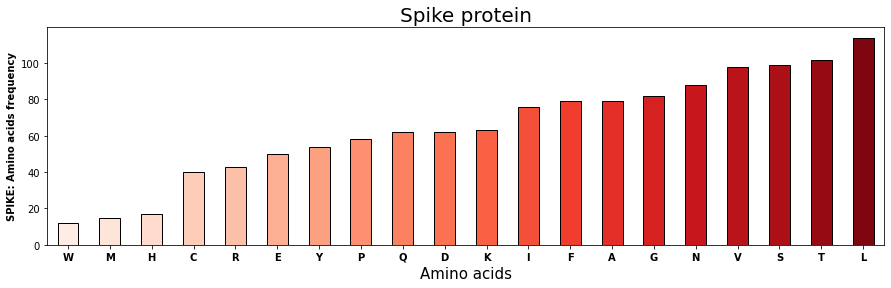

In [28]:
#plot the amino acids frequency
import matplotlib.pyplot as plt
plt.figure(figsize=(15,4))
a= aas['frequency'].plot.bar(color=sns.color_palette('Reds',len(aas)), edgecolor='black')
plt.xticks(rotation=0)
plt.ylabel("SPIKE: Amino acids frequency", weight='bold')
r=list(range(len(aas)))
plt.xticks(r, aas.amino_acids, weight='bold')
plt.xlabel("Amino acids", size=15)
plt.title("Spike protein",  size=20)
plt.show()

In [29]:
spike_covid= 'MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPINLVRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQDVNCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEHVNNSYECDIPIGAGICASYQTQTNSPRRARSVASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLNRALTGIAVEQDKNTQEVFAQVKQIYKTPPIKDFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDILSRLDKVEAEVQIDRLITGRLQSLQTYVTQQLIRAAEIRASANLAATKMSECVLGQSKRVDFCGKGYHLMSFPQSAPHGVVFLHVTYVPAQEKNFTTAPAICHDGKAHFPREGVFVSNGTHWFVTQRNFYEPQIITTDNTFVSGNCDVVIGIVNNTVYDPLQPELDSFKEELDKYFKNHTSPDVDLGDISGINASVVNIQKEIDRLNEVAKNLNESLIDLQELGKYEQYIKWPWYIWLGFIAGLIAIVMVTIMLCCMTSCCSCLKGCCSCGSCCKFDEDDSEPVLKGVKLHYT'
spike_sars= 'MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEIFRSDTLYLTQDLFLPFYSNVTGFHTINHTFGNPVIPFKDGIYFAATEKSNVVRGWVFGSTMNNKSQSVIIINNSTNVVIRACNFELCDNPFFAVSKPMGTQTHTMIFDNAFNCTFEYISDAFSLDVSEKSGNFKHLREFVFKNKDGFLYVYKGYQPIDVVRDLPSGFNTLKPIFKLPLGINITNFRAILTAFSPAQDIWGTSAAAYFVGYLKPTTFMLKYDENGTITDAVDCSQNPLAELKCSVKSFEIDKGIYQTSNFRVVPSGDVVRFPNITNLCPFGEVFNATKFPSVYAWERKKISNCVADYSVLYNSTFFSTFKCYGVSATKLNDLCFSNVYADSFVVKGDDVRQIAPGQTGVIADYNYKLPDDFMGCVLAWNTRNIDATSTGNYNYKYRYLRHGKLRPFERDISNVPFSPDGKPCTPPALNCYWPLNDYGFYTTTGIGYQPYRVVVLSFELLNAPATVCGPKLSTDLIKNQCVNFNFNGLTGTGVLTPSSKRFQPFQQFGRDVSDFTDSVRDPKTSEILDISPCSFGGVSVITPGTNASSEVAVLYQDVNCTDVSTAIHADQLTPAWRIYSTGNNVFQTQAGCLIGAEHVDTSYECDIPIGAGICASYHTVSLLRSTSQKSIVAYTMSLGADSSIAYSNNTIAIPTNFSISITTEVMPVSMAKTSVDCNMYICGDSTECANLLLQYGSFCTQLNRALSGIAAEQDRNTREVFAQVKQMYKTPTLKYFGGFNFSQILPDPLKPTKRSFIEDLLFNKVTLADAGFMKQYGECLGDINARDLICAQKFNGLTVLPPLLTDDMIAAYTAALVSGTATAGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKQIANQFNKAISQIQESLTTTSTALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDILSRLDKVEAEVQIDRLITGRLQSLQTYVTQQLIRAAEIRASANLAATKMSECVLGQSKRVDFCGKGYHLMSFPQAAPHGVVFLHVTYVPSQERNFTTAPAICHEGKAYFPREGVFVFNGTSWFITQRNFFSPQIITTDNTFVSGNCDVVIGIINNTVYDPLQPELDSFKEELDKYFKNHTSPDVDLGDISGINASVVNIQKEIDRLNEVAKNLNESLIDLQELGKYEQYIKWPWYVWLGFIAGLIAIVMVTILLCCMTSCCSCLKGACSCGSCCKFDEDDSEPVLKGVKLHYT'

print(char_frequency(spike_covid))
print(char_frequency(spike_sars))

{'M': 14, 'F': 77, 'V': 97, 'L': 108, 'P': 58, 'S': 99, 'Q': 62, 'C': 40, 'N': 88, 'T': 97, 'R': 42, 'A': 79, 'Y': 54, 'G': 82, 'D': 62, 'K': 61, 'H': 17, 'W': 12, 'I': 76, 'E': 48}
{'M': 20, 'F': 83, 'I': 78, 'L': 99, 'T': 99, 'S': 96, 'G': 79, 'D': 73, 'R': 39, 'C': 39, 'V': 91, 'Q': 55, 'A': 84, 'P': 57, 'N': 81, 'Y': 54, 'H': 15, 'E': 42, 'K': 60, 'W': 11}


# References:
***
[1] Viral proteins https://www.nature.com/subjects/viral-proteins

[2] A new coronavirus associated with human respiratory disease in China https://www.nature.com/articles/s41586-020-2008-3#rightslink

[3] What is DNA? https://ghr.nlm.nih.gov/primer/basics/dna

[4] Gene expression figure https://astrobiochem.wordpress.com/grade-10-biology/ch-11-gene-expression/

[5] Overview of Translation: https://www.khanacademy.org/science/biology/gene-expression-central-dogma/translation-polypeptides/a/translation-overview

[6] 3DMD geneti codon poster https://www.3dmoleculardesigns.com/Education-Products/Genetic-Codon-Poster.htm

[7] NIH. Open Reading Frames https://www.genome.gov/genetics-glossary/Open-Reading-Frame

[8] Protection from SARS coronavirus conferred by live measles vaccine expressing the spike glycoprotein. https://www.ncbi.nlm.nih.gov/pubmed/24606680

[9] Coronavirus figure https://www.prosci-inc.com/covid-19/

[10] Viral Protein: Definition, Components & Functions https://study.com/academy/lesson/viral-protein-definition-components-functions.html

[11] DNA figure 1 https://upload.wikimedia.org/wikipedia/commons/thumb/e/e2/Eukaryote_DNA-en.svg/1280px-Eukaryote_DNA-en.svg.png

[12] DNA figure 2 http://www.nature.com/scitable/content/ne0000/ne0000/ne0000/ne0000/104944953/73_1_2.jpg

[13] https://www.kaggle.com/freddieta/rna-similarity-sars-mers-cov2

[14] ACE-2: The Receptor for SARS-CoV-2 https://www.rndsystems.com/resources/articles/ace-2-sars-receptor-identified

[15] Prabakaran P, Gan J, Feng Y, Zhu Z, Choudhry V, et al. Structure of severe acute respiratory syndrome coronavirus receptor-binding domain complexed with neutralizing antibody. J Biol Chem. 2006;281:15829–15836. [[PubMed]](https://www.ncbi.nlm.nih.gov/pubmed/16597622) 

[16] Hwang WC, Lin Y, Santelli E, Sui J, Jaroszewski L, et al. Structural basis of neutralization by a human anti-severe acute respiratory syndrome spike protein antibody, 80R. J Biol Chem. 2006;281:34610–34616. [[PubMed]](https://www.ncbi.nlm.nih.gov/pubmed/16954221) 

[17] DNA Features viewer https://github.com/Edinburgh-Genome-Foundry/DnaFeaturesViewer

[18] Pozzoli U, Menozzi G, Fumagalli M, et al. (2008). https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2292697/

[19] <a href='https://www.freepik.com/photos/background'>Background photo created by kjpargeter - www.freepik.com</a>